In [1]:
import sys
print(sys.version)

2.7.12 (default, Nov 19 2016, 06:48:10) 
[GCC 5.4.0 20160609]


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [9]:
dados = pd.read_csv('cs-training.csv')

In [11]:
dados = dados.drop('Unnamed: 0', 1)
dados.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
dados.shape

(150000, 12)

In [12]:
#Quantidade de default na amostra
dados.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,NaN,5.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.154181,52.000000,0.000000,0.366508,NaN,8.000000,0.000000,1.000000,0.000000,NaN
75%,0.000000,0.559046,63.000000,0.000000,0.868254,NaN,11.000000,0.000000,2.000000,0.000000,NaN
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [31]:
#Contar a quantidade de NA em cada variável
print ('total de dados: ' + str(dados.shape[0]))
dados.isnull().sum()

total de dados: 150000


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [39]:
#monthly income tem muitos NA
#separar em train e test set
X_train, X_test, y_train, y_test = train_test_split(dados.iloc[:,1:12], dados['SeriousDlqin2yrs'], test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

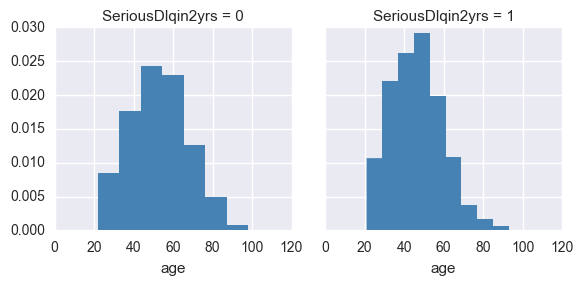

In [27]:
g = sns.FacetGrid(dados, col="SeriousDlqin2yrs", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "age", color="steelblue", lw=0, normed = True)